#EDA Analysis On Retail Store Data


---



> **In this project, We will work with a dataset
    containing information about retail sales. The goal is
    to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
    help the retail business make informed decisions**





#Data Loading and Cleaning: Load the retail sales dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [ ]:
df.isnull().any()

Transaction ID      False
Date                False
Customer ID         False
Gender              False
Age                 False
Product Category    False
Quantity            False
Price per Unit      False
Total Amount        False
dtype: bool

In [ ]:
df.drop(columns = ['Transaction ID'],inplace = True)


#Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).


In [ ]:
df[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [ ]:
avg_purchase_amount = df.groupby('Gender')
avg_male_purchase_amount = avg_purchase_amount.get_group('Male')
avg_female_purchase_amount = avg_purchase_amount.get_group('Female')
avg_female_purchase_amount.head(2)

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
5,2023-04-25,CUST006,Female,45,Beauty,1,30,30


**Gender Wise Analysis**

**Male**

In [ ]:
avg_male_purchase_amount[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,490.000000,490.000000,490.000000,490.000000
mean,41.428571,2.481633,179.704082,455.428571
std,13.812208,1.133551,190.736020,566.433809
min,18.000000,1.000000,25.000000,25.000000
25%,30.000000,1.000000,30.000000,60.000000
50%,42.000000,2.000000,50.000000,120.000000
75%,54.000000,4.000000,300.000000,900.000000
max,64.000000,4.000000,500.000000,2000.000000


In [ ]:
avg_age_of_male = round(avg_male_purchase_amount.Age.mean(),2)
avg_quantity_purchased_by_male = round(avg_male_purchase_amount.Quantity.mean(),2)
total_amount_spend_by_male = round(avg_male_purchase_amount['Total Amount'].mean(),2)
print("Avg age of Male : ",avg_age_of_male)
print("Avg quantity Purchased : ",avg_quantity_purchased_by_male)
print("Avg Amount spend : ",total_amount_spend_by_male)

Avg age of Male :  41.43
Avg quantity Purchased :  2.48
Avg Amount spend :  455.43


**Female**

In [ ]:
avg_female_purchase_amount[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,510.000000,510.000000,510.000000,510.000000
mean,41.356863,2.545098,180.068627,456.549020
std,13.568067,1.132189,188.849649,554.299371
min,18.000000,1.000000,25.000000,25.000000
25%,29.000000,2.000000,30.000000,60.000000
50%,42.000000,3.000000,50.000000,150.000000
75%,52.750000,4.000000,300.000000,900.000000
max,64.000000,4.000000,500.000000,2000.000000


In [ ]:
avg_age_of_female = round(avg_female_purchase_amount.Age.mean(),2)
avg_quantity_purchased_by_female = round(avg_female_purchase_amount.Quantity.mean(),2)
total_amount_spend_by_female = round(avg_female_purchase_amount['Total Amount'].mean(),2)
print("Avg age of Female : ",avg_age_of_female)
print("Avg quantity Purchased : ",avg_quantity_purchased_by_female)
print("Avg Amount spend : ",total_amount_spend_by_female)

Avg age of Female :  41.36
Avg quantity Purchased :  2.55
Avg Amount spend :  456.55


In [ ]:
avg_purchase_amount[['Age','Quantity','Total Amount']].mean()
avg_purchase_amount[['Age','Quantity','Total Amount']].std()

,Age,Quantity,Total Amount
Gender,,,
Female,13.568067,1.132189,554.299371
Male,13.812208,1.133551,566.433809


#Time Series Analysis: Analyze sales trends over time using time series techniques.

In [ ]:
df.head(4)

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500


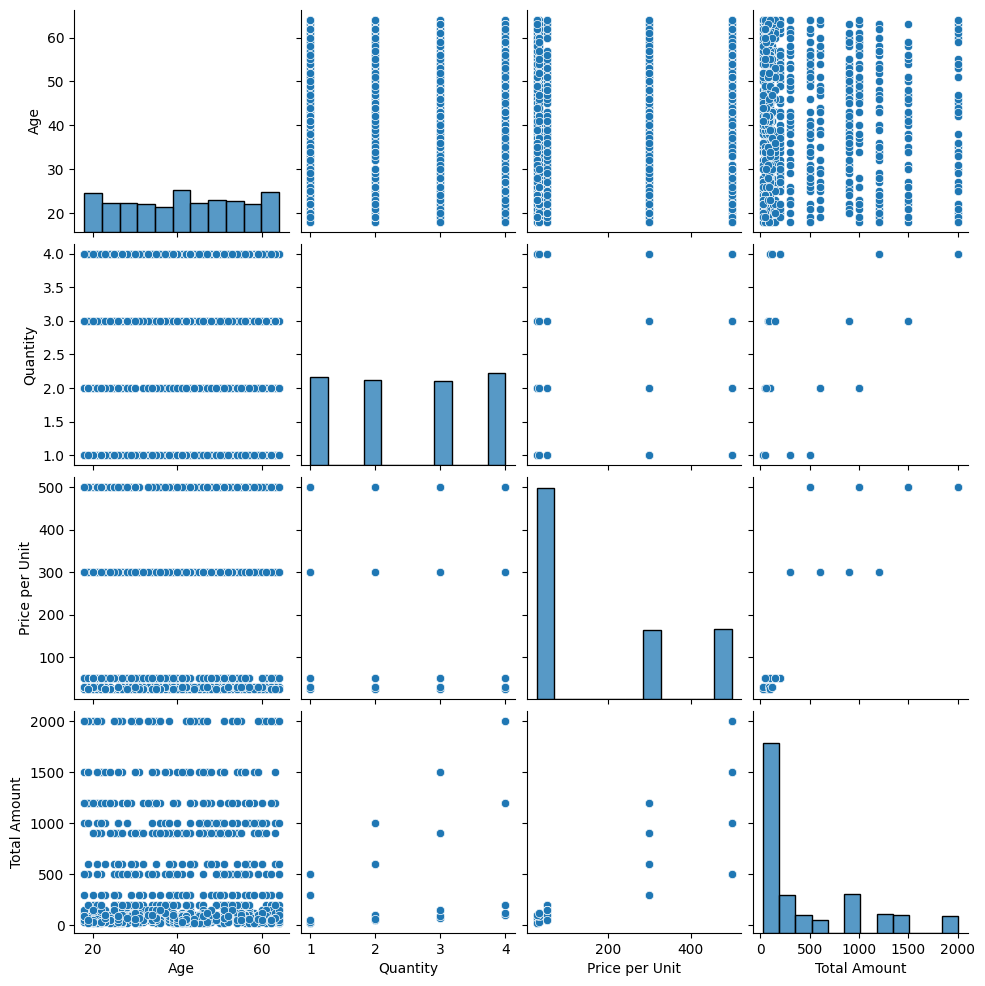

In [ ]:
sns.pairplot(data = df)

In [ ]:
df['Year'] = df['Date'].dt.year

In [ ]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5


In [ ]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
max_month_sales = monthly_sales.sort_values().max()
min_month_sales =  monthly_sales.sort_values().min()
print(f"Max Sales is {max_month_sales} in {monthly_sales.idxmax()}th Month " )
print(f"Min Sales is {min_month_sales} in {monthly_sales.idxmin()}th Month")


Max Sales is 53150 in 5th Month 
Min Sales is 23620 in 9th Month


In [ ]:
yearly_sales = df.groupby('Year')['Total Amount'].sum()
yearly_sales

Year
2023    454470
2024      1530
Name: Total Amount, dtype: int64

#Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

In [ ]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [ ]:
df[['Gender','Quantity']].value_counts()

Gender  Quantity
Female  4           138
Male    1           128
Female  3           127
        1           125
Male    4           125
        2           123
Female  2           120
Male    3           114
Name: count, dtype: int64

In [ ]:
Total_Sales_by_category = df.groupby('Product Category')['Total Amount'].sum()
Total_Sales_by_category.sort_values()
print(f"Max Sales Generated by {Total_Sales_by_category.idxmax()} Product is {Total_Sales_by_category.max()}")
print(f"Min Sales Generated by {Total_Sales_by_category.idxmin()} Product is {Total_Sales_by_category.min()}")

Max Sales Generated by Electronics Product is 156905
Min Sales Generated by Beauty Product is 143515


In [ ]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Female    510
Male      490
Name: count, dtype: int64

In [ ]:
gender_wise_purchasing_power = df.groupby('Gender')['Total Amount'].sum()
print(f"Most Sales generated by {gender_wise_purchasing_power.idxmax()} is {gender_wise_purchasing_power.max()}")

Most Sales generated by Female is 232840


#Visualization: Present insights through bar charts, line plots, and heatmaps.

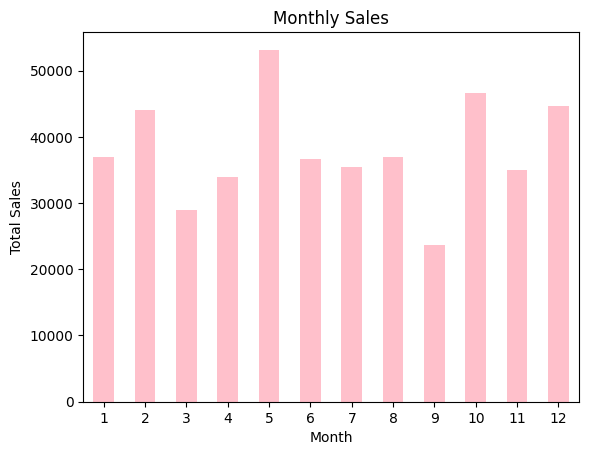

In [ ]:
monthly_sales.plot(kind = 'bar',color = 'Pink')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales")
plt.xticks(rotation = 0)
plt.show()

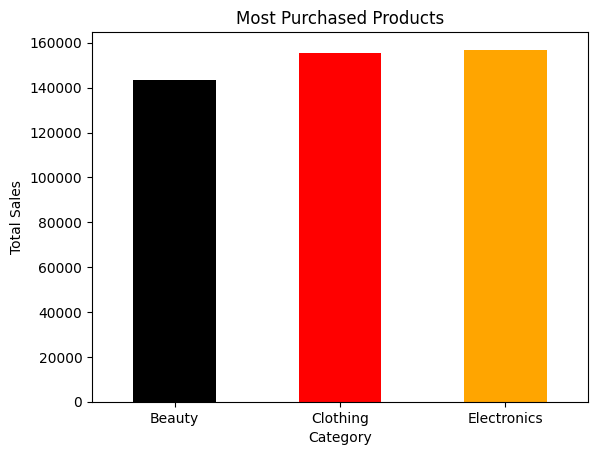

In [ ]:
Total_Sales_by_category.plot(kind = 'bar',color = ['Black','Red','Orange'] )
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Most Purchased Products")
plt.xticks(rotation = 0)
plt.show()

<Axes: >

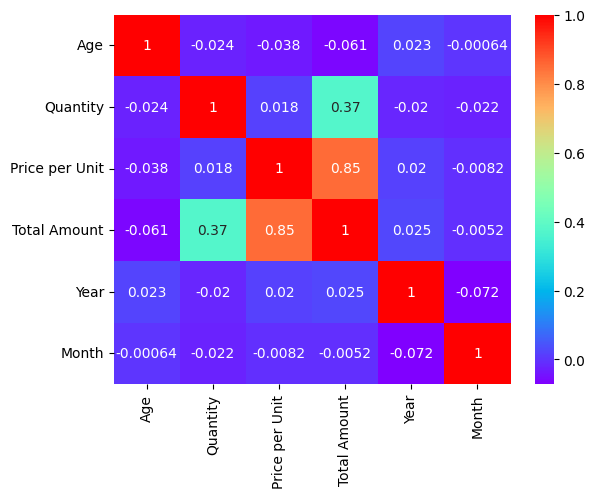

In [ ]:
sns.heatmap(df.corr(numeric_only = True),annot = True,cmap= 'rainbow')
#Here we find that Age and  amount are negativily correlted tends to older customer are less buying the products

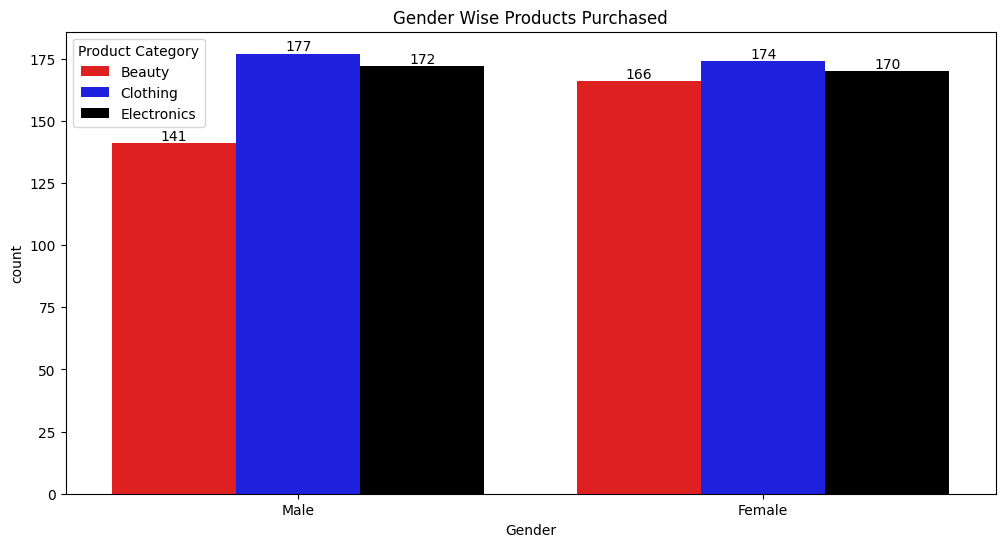

In [ ]:
plt.figure(figsize = (12,6))
category_wise_count = sns.countplot(data = df,x = 'Gender',hue = "Product Category",palette=['Red','Blue','Black'])
plt.title("Gender Wise Products Purchased")
for x in category_wise_count.containers:
  category_wise_count.bar_label(x)

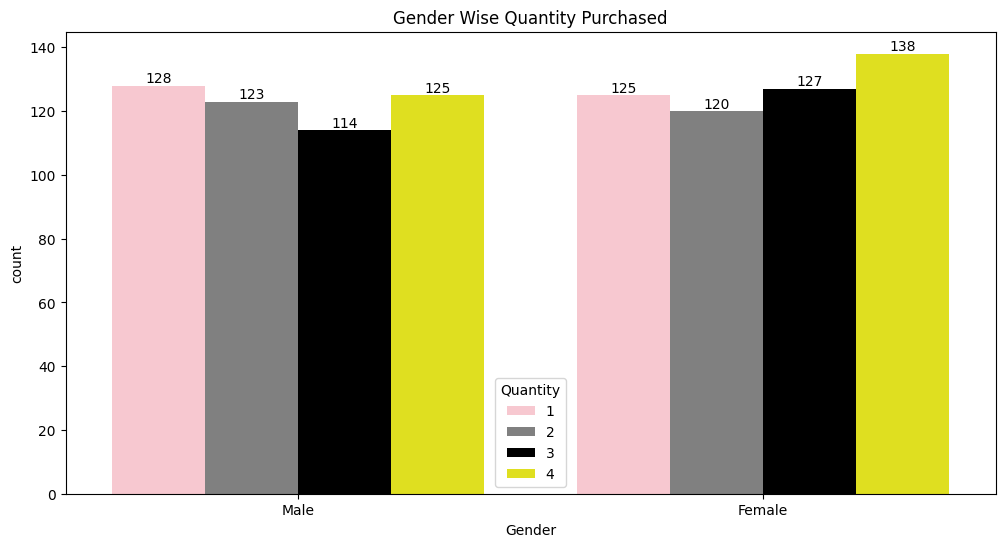

In [ ]:
plt.figure(figsize = (12,6))
gender_wise_quantity_purchased = sns.countplot(data =df,x = 'Gender',hue = "Quantity",palette = ['Pink','Gray','Black','Yellow'])
plt.title("Gender Wise Quantity Purchased")
for x in gender_wise_quantity_purchased.containers:
  gender_wise_quantity_purchased.bar_label(x)

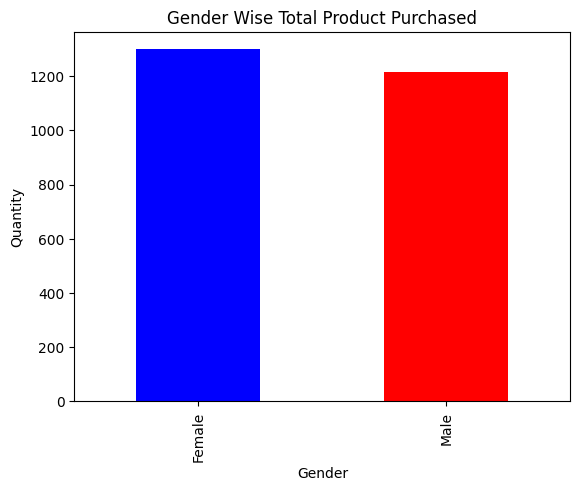

In [ ]:
gender_wise_quantity = df.groupby('Gender')['Quantity'].sum()
gender_wise_quantity.plot(kind = 'bar',color = ['Blue','Red'])
plt.title("Gender Wise Total Product Purchased")
plt.ylabel("Quantity")
plt.show()


#Recommendations: Provide actionable recommendations based on the EDA.


**Gender Wise Analysis**


  * The purchases made by male and femal are almost same

* ✅   The female contributing slightly more than the total sales




**Product Category Analysis**

* The most purchased category is Clothing

* The Most revenue generated by Electronic Products

* ✅We can promote more Electronic Products as it is
giving us High Sales


**Time Series Analysis**
*   Monthly Sales are fluctuated with highest sales occuring in May Month and Lowest sales occuring in September Month.
*   ❌Yearly sales are decreased

**Customer Demographic**
* The avg age of Male is 41 Years,Both Male and Female avg age is almost same.

* The avg quantity they are buying is 2-3

**Key Point**


* ✅We can promote Beauty products to increase our sales

* ✅We can give sales in the month of September to increase our sales in that month